In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd 
import os, cv2
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import metrics
from scipy import stats

from keras import backend as K
K.set_image_dim_ordering('tf')

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, adam
from keras import layers, optimizers, regularizers

np.random.seed(1000)

In [0]:
data_path = '/content/drive/My Drive/Final Project DL /Data/f0'

In [0]:
# Input information
img_rows = 112
img_cols = 112
num_channel = 1

In [0]:
# Create a list of labels and image's array 
img_data_list = []
labels_list = []
i = 0

# List of all image's name
img_names = os.listdir(data_path)
for img in img_names:
    # Label
    tmp_name = img.split('_')[:-1]
    if len(tmp_name) == 2:
        labels_list.append(tmp_name[0] + '-' + tmp_name[1])
    else: 
        labels_list.append(tmp_name[0])
    
    # Read image
    input_img = cv2.imread(data_path +'/'+ img, cv2.IMREAD_UNCHANGED)
    input_img = input_img[:,:,3]
    input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
    img_data_list.append(input_img_resize)
    i = i+1
    if i%100 == 0: 
      print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [0]:
img_data = np.array(img_data_list)
img_data = img_data.reshape(img_data.shape[0], img_rows, img_cols, 1)
img_data = img_data.astype('float32')
img_data /= 255

labels = np.array(labels_list)

In [0]:
num_classes = len(np.unique(labels_list))
print(np.unique(labels_list, return_counts = True))

(array(['carousel', 'description', 'episode', 'full', 'grid-view',
       'header', 'home-marquee', 'onboarding', 'portrait-photograph',
       'search-page', 'sidebar', 'signup', 'video-thumbnail', 'youtube'],
      dtype='<U19'), array([197, 254, 316, 234, 282, 183, 194, 166, 182, 181, 178, 278, 232,
       301]))


In [0]:
# Define column name of the label vector
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
tmp_y = le.fit_transform(labels.ravel())

In [0]:
print(tmp_y)
print(len(tmp_y))
print(img_names)

[9 9 9 ... 0 0 0]
3178
['search_page_eeb7cefc-6ec1-44d4-bf87-e79aa514f851.png', 'search_page_eed322a5-b302-4ef2-a35b-df074583b84d.png', 'search_page_f0cf0dda-d2c4-4499-9984-cd347c238f30.png', 'search_page_f61cc7f6-61b3-4938-860a-d8ae989f89a5.png', 'search_page_f62452c7-4d98-4edb-8ea1-f0b75e80c735.png', 'search_page_f7d58ddf-218b-488b-9b31-d6878a2d89ea.png', 'search_page_f7e9aa32-040d-4732-8be9-3a1d21b5b1d3.png', 'search_page_f1409366-04b8-4242-b6aa-880c7c34c15c.png', 'search_page_ffd3ad77-98c5-4bab-9d35-b8cfc27e66a2.png', 'search_page_f95d64b5-8a40-42b1-8639-7a1f3b66d900.png', 'search_page_fd5de10a-5fb8-470e-9fb9-64712d22d5a0.png', 'sidebar_00d53b02-8d39-41da-81f3-f99a72537f91.png', 'sidebar_032bbc07-06ed-4341-8264-099495fc0249.png', 'sidebar_0990ecdc-4150-4e93-b380-ef8312e4d34d.png', 'sidebar_087f693d-e721-4b63-8046-ca7fddd19093.png', 'sidebar_0865ddb3-8651-4429-b29c-6ed768464838.png', 'sidebar_0825e35c-f996-45b0-9955-a3768569d1f6.png', 'sidebar_09b35eae-4fa9-41c4-bb82-96048dae8e85.pn

In [0]:
# Split the dataset
X_train, x_test, Y_train, y_test = train_test_split(img_data, tmp_y, test_size=0.2, random_state=2)

In [0]:
y_train_hot = np_utils.to_categorical(Y_train, num_classes)

In [0]:
# Define model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=256, input_shape=(img_rows,img_cols,1), kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization(axis=1,momentum=0.9,epsilon=0.001))
model.add(Dropout(0.3))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# model.add(BatchNormalization(axis=1,momentum=0.9,epsilon=0.001))
model.add(Dropout(0.3))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# model.add(BatchNormalization(axis=1,momentum=0.9,epsilon=0.001))
model.add(Dropout(0.3))
6
# 5th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# model.add(BatchNormalization(axis=1,momentum=0.9,epsilon=0.001))
model.add(Dropout(0.3))
          
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(64))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 256)     2560      
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       295040    
_________________________________________________________________
activation_2 (Activation)    (None, 56, 56, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
__________

In [0]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath= '/content/drive/My Drive/Final Project DL /Data/8 Edition/' + '8Edit_Best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=10)
]

model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 64
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model.fit(X_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Train on 2033 samples, validate on 509 samples
Epoch 1/50
2033/2033 [==============================] - 13s 6ms/step - loss: 2.5615 - acc: 0.1382 - val_loss: 2.4335 - val_acc: 0.3418
Epoch 2/50
2033/2033 [==============================] - 10s 5ms/step - loss: 1.9967 - acc: 0.3532 - val_loss: 1.4965 - val_acc: 0.5599
Epoch 3/50
2033/2033 [==============================] - 10s 5ms/step - loss: 1.3316 - acc: 0.5844 - val_loss: 0.7418 - val_acc: 0.8664
Epoch 4/50
2033/2033 [==============================] - 10s 5ms/step - loss: 0.9480 - acc: 0.6931 - val_loss: 0.5912 - val_acc: 0.8409
Epoch 5/50
2033/2033 [==============================] - 10s 5ms/step - loss: 0.7833 - acc: 0.7486 - val_loss: 0.3887 - val_acc: 0.8998
Epoch 6/50
2033/2033 [==============================] - 10s 5ms/step - loss: 0.6272 - acc: 0.8023 - val_loss: 0.3583 - val_acc: 0.9057
Epoch 7/50
2033/2033 [==============================] - 10s 5ms/step - loss: 0.5406 - acc: 0.8303 - val_loss: 0.3112 - val_acc: 0.9234
Epoch 8/

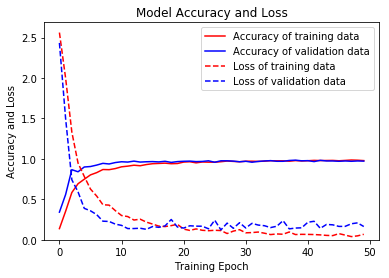

In [0]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [0]:
# Print confusion matrix for test data
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
print(classification_report(y_test, max_y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       1.00      0.94      0.97        51
           2       1.00      0.97      0.98        61
           3       0.91      1.00      0.95        50
           4       0.97      0.98      0.98        63
           5       0.97      0.97      0.97        30
           6       0.97      0.97      0.97        33
           7       0.89      0.97      0.93        32
           8       0.98      0.95      0.96        43
           9       1.00      0.93      0.97        46
          10       0.98      0.98      0.98        45
          11       0.95      0.97      0.96        40
          12       0.98      0.90      0.94        52
          13       0.89      0.96      0.92        51

    accuracy                           0.96       636
   macro avg       0.96      0.96      0.96       636
weighted avg       0.96      0.96      0.96       636



In [0]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/My Drive/Final Project DL /Data/8 Edition/'+'8Edit_history_final_project.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [0]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/Final Project DL /Data/8 Edition/model_m.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_m.save_weights("/content/drive/My Drive/Final Project DL /Data/8 Edition/model_m.h5")
print("Saved model to disk")

Saved model to disk
